**MLP on MNIST using Keras**

In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
#loading the data and splitting

(X_train,y_train),(X_test,y_test)=mnist.load_data()


11493376/11490434 [==============================] - 3s 0us/step


In [3]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [4]:
#we have 28*28 vector for each image
#we will convert it into single dimensional vector


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 


print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
#normalizing the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [6]:
#Let's do one-hot encoding on y_test and y_train
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

**MLP with 2 hidden layers + RELU + BatchNormalisation + AdamOpltimizer**

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [9]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first and second hidden layer 450 and 125 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.066  => N(0,σ) = N(0,0.066)
# h2 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)

model_relu.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.066, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0628 19:08:35.011224 140468860983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 19:08:35.046236 140468860983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 19:08:35.053457 140468860983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0628 19:08:35.166637 140468860983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0628 19:08:35.304924 14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 450)               353250    
_________________________________________________________________
batch_normalization_1 (Batch (None, 450)               1800      
_________________________________________________________________
dense_2 (Dense)              (None, 125)               56375     
_________________________________________________________________
batch_normalization_2 (Batch (None, 125)               500       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1260      
Total params: 413,185
Trainable params: 412,035
Non-trainable params: 1,150
_________________________________________________________________


In [10]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0628 19:08:35.335697 140468860983168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 19:08:35.473053 140468860983168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2102 - acc: 0.9369 - val_loss: 0.1060 - val_acc: 0.9671
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0754 - acc: 0.9773 - val_loss: 0.0961 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0824 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.0780 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0234 - acc: 0.9932 - val_loss: 0.0776 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.0759 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0161 - acc: 0.9951 - val_loss: 0.0876 - 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.08836428574263192
Test accuracy: 0.9781


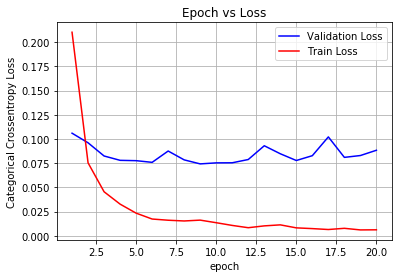

In [14]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP with 2 hidden layers + RELU + BatchNormalisation + Dropout + AdamOpltimizer**

In [17]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_relu = Sequential()
#Let's take dimension of first and second hidden layer 450 and 125 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.066  => N(0,σ) = N(0,0.066)
# h2 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)

model_relu.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.066, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0628 19:13:02.983079 140468860983168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 450)               353250    
_________________________________________________________________
batch_normalization_5 (Batch (None, 450)               1800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 450)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 125)               56375     
_________________________________________________________________
batch_normalization_6 (Batch (None, 125)               500       
_________________________________________________________________
dropout_2 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1260      
Total para

In [20]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let no of epoch=25
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 132us/step - loss: 0.0580 - acc: 0.9815 - val_loss: 0.0585 - val_acc: 0.9826
Epoch 2/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.0514 - acc: 0.9832 - val_loss: 0.0570 - val_acc: 0.9822
Epoch 3/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.0534 - acc: 0.9830 - val_loss: 0.0530 - val_acc: 0.9838
Epoch 4/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.0524 - acc: 0.9827 - val_loss: 0.0576 - val_acc: 0.9831
Epoch 5/25
60000/60000 [==============================] - 7s 122us/step - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0574 - val_acc: 0.9832
Epoch 6/25
60000/60000 [==============================] - 7s 121us/step - loss: 0.0483 - acc: 0.9842 - val_loss: 0.0594 - val_acc: 0.9832
Epoch 7/25
60000/60000 [==============================] - 7s 122us/step - loss: 0.0491 - acc: 0.9843 - val_loss: 0.0587 - 

Test score: 0.06270100064466387
Test accuracy: 0.9836


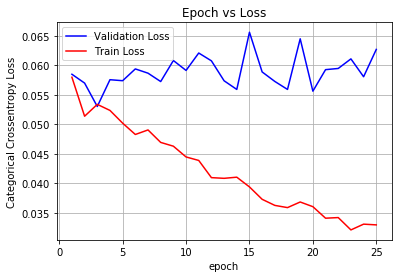

In [22]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**MLP with 3 hidden layers + RELU + BatchNormalisation + Without Dropout + AdamOpltimizer**


In [27]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 500, 300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h2 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h3 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))


model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )

#Adding batchNormalization in hidden layer 2 to perform better internal covariate shift
model_relu.add(BatchNormalization())

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 575,110
Trainable params: 574,510
Non-trainable params: 600
_________________________________________________________________


In [28]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2143 - acc: 0.9359 - val_loss: 0.1210 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0846 - acc: 0.9739 - val_loss: 0.1106 - val_acc: 0.9637
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0558 - acc: 0.9825 - val_loss: 0.0954 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 8s 142us/step - loss: 0.0435 - acc: 0.9860 - val_loss: 0.0963 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0328 - acc: 0.9895 - val_loss: 0.1007 - val_acc: 0.9687
Epoch 6/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0270 - acc: 0.9912 - val_loss: 0.0989 - val_acc: 0.9713
Epoch 7/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0212 - acc: 0.9935 - val_loss: 0.0872 -

Test score: 0.09879382811700516
Test accuracy: 0.9794


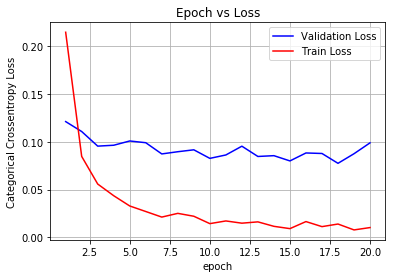

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP with 3 hidden layers + RELU + BatchNormalisation +  Dropout + AdamOpltimizer**


In [33]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 500, 300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h2 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h3 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )

#Adding batchNormalization in hidden layer 2 to perform better internal covariate shift
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
__________

In [34]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch=25
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 163us/step - loss: 1.2064 - acc: 0.7068 - val_loss: 0.2421 - val_acc: 0.9314
Epoch 2/25
60000/60000 [==============================] - 9s 145us/step - loss: 0.3941 - acc: 0.8858 - val_loss: 0.1701 - val_acc: 0.9467
Epoch 3/25
60000/60000 [==============================] - 9s 146us/step - loss: 0.2839 - acc: 0.9172 - val_loss: 0.1344 - val_acc: 0.9585
Epoch 4/25
60000/60000 [==============================] - 9s 147us/step - loss: 0.2320 - acc: 0.9335 - val_loss: 0.1160 - val_acc: 0.9651
Epoch 5/25
60000/60000 [==============================] - 9s 147us/step - loss: 0.1985 - acc: 0.9438 - val_loss: 0.1009 - val_acc: 0.9705
Epoch 6/25
60000/60000 [==============================] - 9s 144us/step - loss: 0.1737 - acc: 0.9493 - val_loss: 0.0893 - val_acc: 0.9732
Epoch 7/25
60000/60000 [==============================] - 9s 144us/step - loss: 0.1608 - acc: 0.9542 - val_loss: 0.0851 -

Test score: 0.0706583952285393
Test accuracy: 0.9818


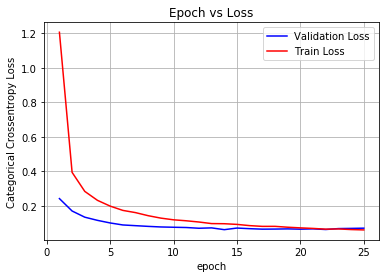

In [35]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP with 5 hidden layers + RELU + BatchNormalisation + Without Dropout + AdamOpltimizer**

In [40]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_relu.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_relu.add(BatchNormalization())

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )


model_relu.add(BatchNormalization())


model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_10 (Batc (None, 500)               2000      
_________________________________________________________________
dense_23 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_24 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_11 (Batc (None, 300)               1200      
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
__________

In [41]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch=20
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.2216 - acc: 0.9338 - val_loss: 0.1490 - val_acc: 0.9528
Epoch 2/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.0942 - acc: 0.9713 - val_loss: 0.1171 - val_acc: 0.9640
Epoch 3/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0650 - acc: 0.9793 - val_loss: 0.1072 - val_acc: 0.9685
Epoch 4/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.0556 - acc: 0.9815 - val_loss: 0.1177 - val_acc: 0.9645
Epoch 5/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.0466 - acc: 0.9850 - val_loss: 0.0762 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.0367 - acc: 0.9879 - val_loss: 0.0837 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 16s 258us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.

Test score: 0.09412301840839209
Test accuracy: 0.9782


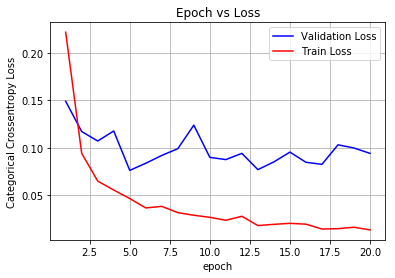

In [42]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP with 5 hidden layers + RELU + BatchNormalisation + Dropout + AdamOpltimizer**


In [46]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu.add(Dropout(0.5))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_relu.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_14 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_14 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_16 (Dropout)         (None, 400)               0         
__________

In [47]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch=30
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 348us/step - loss: 1.8546 - acc: 0.5357 - val_loss: 0.4083 - val_acc: 0.8852
Epoch 2/30
60000/60000 [==============================] - 18s 303us/step - loss: 0.5280 - acc: 0.8410 - val_loss: 0.2101 - val_acc: 0.9396
Epoch 3/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.3404 - acc: 0.9041 - val_loss: 0.1492 - val_acc: 0.9570
Epoch 4/30
60000/60000 [==============================] - 18s 306us/step - loss: 0.2693 - acc: 0.9275 - val_loss: 0.1232 - val_acc: 0.9639
Epoch 5/30
60000/60000 [==============================] - 18s 304us/step - loss: 0.2256 - acc: 0.9393 - val_loss: 0.1083 - val_acc: 0.9693
Epoch 6/30
60000/60000 [==============================] - 18s 307us/step - loss: 0.1936 - acc: 0.9480 - val_loss: 0.0956 - val_acc: 0.9732
Epoch 7/30
60000/60000 [==============================] - 19s 310us/step - loss: 0.1746 - acc: 0.9532 - val_loss: 0.

Test score: 0.06972299479774956
Test accuracy: 0.9841


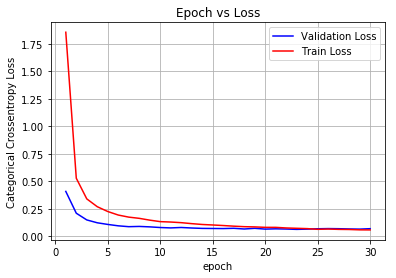

In [48]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Observations**

In [50]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No of layer","With/Without Dropout", "Accuracy %"]

x.add_row(["2","Without","97.81"])
x.add_row(["2","With Dropout","98.36"])
x.add_row(["3","Without","97.98"])
x.add_row(["3","With Dropout","98.18"])
x.add_row(["5","Without","97.80"])
x.add_row(["5","With Dropout","98.41"])


print(x)

+-------------+----------------------+------------+
| No of layer | With/Without Dropout | Accuracy % |
+-------------+----------------------+------------+
|      2      |       Without        |   97.81    |
|      2      |     With Dropout     |   98.36    |
|      3      |       Without        |   97.98    |
|      3      |     With Dropout     |   98.18    |
|      5      |       Without        |   97.80    |
|      5      |     With Dropout     |   98.41    |
+-------------+----------------------+------------+


We can observe that after applying Dropout our accuracy increases.

We applied batch normalisation not at all layers to reduce internal covariate shift.